In [1]:
import sys
sys.path.append("..")

from deepvideo import *

Using TensorFlow backend.


## Loading data

In [2]:
(X_train, y_train), (X_test, y_test) = get_ucf_dataset()

In [3]:
data = VideoLoader(16, input_shape=(1, 244, 244, 3), data_aug=get_augmentations(), label_mapping='../../UCF-101-dataset/Class Index.txt')

In [4]:
data.from_list('../../UCF-101-dataset/UCF-101-jpeg/', (X_train, y_train), (X_test, y_test))

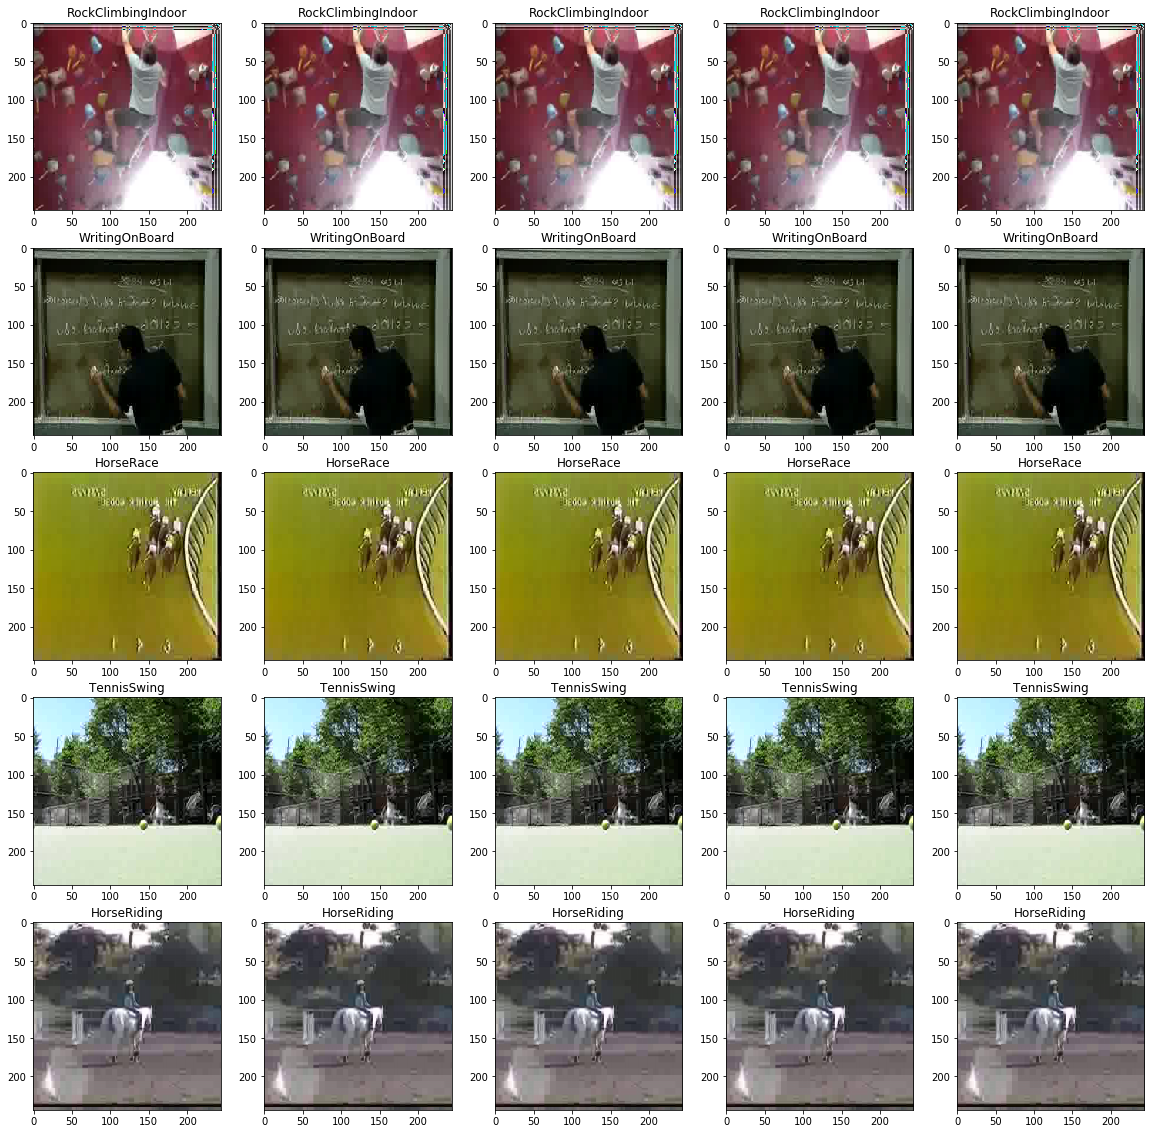

In [5]:
data.show_frames()

In [6]:
data.show_videos()

## Building tfrecord dataset

In [7]:
# data.build_tfrecord_dataset('../tfdataset', 10)

In [8]:
data.use_tfrecord_as_generator('../tfdataset/')

## Defining the model

In [9]:
model = Inception(classes=data.n_classes, input_shape=data.input_shape)

## Training

In [10]:
learner = VideoLearner(data, model)

In [11]:
learner.unfreeze()

In [12]:
learner.lr_find(2)

Epoch 1/2
485/595 [=======================>......] - ETA: 36s - loss: 4.6766 - acc: 0.0513

In [13]:
learner.recorder.plot_loss()

In [14]:
learner.fit_one_cycle(10, 0.00007)

Epoch 1/10
595/595 [==============================] - 257s 432ms/step - loss: 4.4907 - acc: 0.0535 - val_loss: 4.0980 - val_acc: 0.1864
Epoch 2/10
595/595 [==============================] - 274s 461ms/step - loss: 3.7363 - acc: 0.2263 - val_loss: 3.1839 - val_acc: 0.3567
Epoch 3/10
595/595 [==============================] - 269s 453ms/step - loss: 2.8867 - acc: 0.3937 - val_loss: 2.3991 - val_acc: 0.4886
Epoch 4/10
595/595 [==============================] - 281s 473ms/step - loss: 2.1886 - acc: 0.5258 - val_loss: 1.8520 - val_acc: 0.5773
Epoch 5/10
595/595 [==============================] - 264s 443ms/step - loss: 1.6330 - acc: 0.6294 - val_loss: 1.5022 - val_acc: 0.6258
Epoch 6/10
595/595 [==============================] - 261s 439ms/step - loss: 1.2752 - acc: 0.7004 - val_loss: 1.3221 - val_acc: 0.6555
Epoch 7/10
595/595 [==============================] - 265s 445ms/step - loss: 1.0217 - acc: 0.7502 - val_loss: 1.2189 - val_acc: 0.6740
Epoch 8/10
595/595 [============================

In [15]:
learner.fit_one_cycle(5, 1e-6)

Epoch 1/5
595/595 [==============================] - 256s 430ms/step - loss: 0.4525 - acc: 0.8894 - val_loss: 1.0536 - val_acc: 0.7190
Epoch 2/5
595/595 [==============================] - 273s 459ms/step - loss: 0.4498 - acc: 0.8869 - val_loss: 1.0468 - val_acc: 0.7206
Epoch 3/5
595/595 [==============================] - 272s 458ms/step - loss: 0.4380 - acc: 0.8904 - val_loss: 1.0491 - val_acc: 0.7222
Epoch 4/5
595/595 [==============================] - 285s 479ms/step - loss: 0.4107 - acc: 0.8983 - val_loss: 1.0465 - val_acc: 0.7211
Epoch 5/5
595/595 [==============================] - 266s 447ms/step - loss: 0.4109 - acc: 0.9016 - val_loss: 1.0410 - val_acc: 0.7240


In [16]:
learner.save('../models/rgb/inception/inception_rgb_1f_v2')

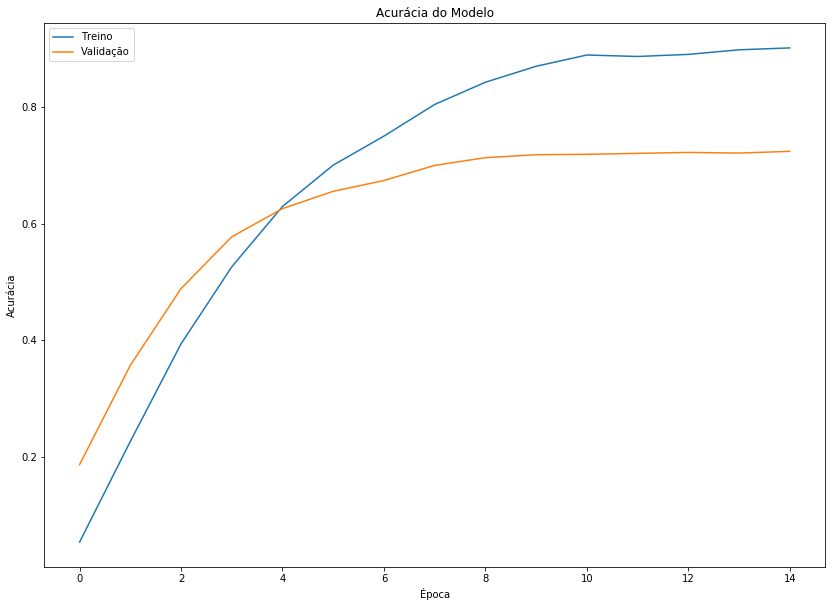

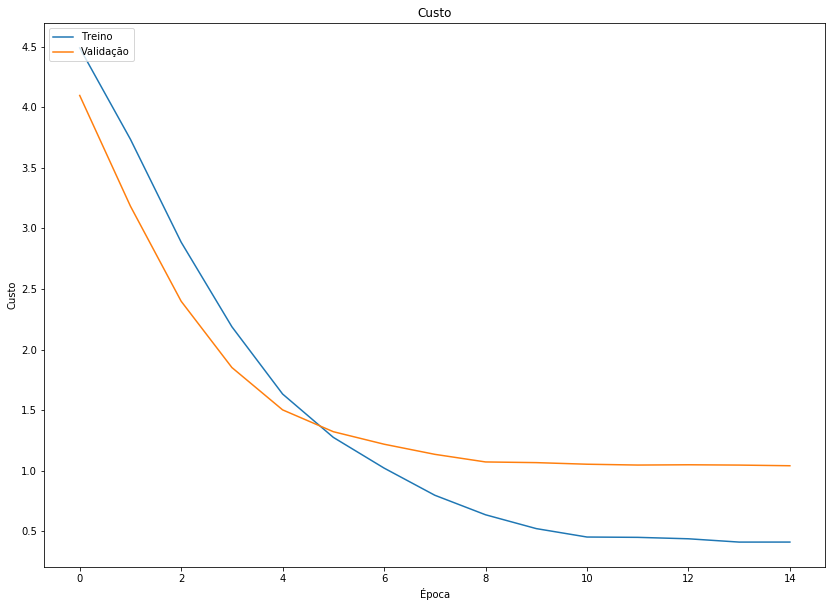

In [17]:
learner.plot_history()

In [18]:
learner.save_report('../models/rgb/inception/')

In [11]:
learner.load('../models/rgb/inception/inception_rgb_1f_v2')

## Interpreting

In [12]:
interp = VideoClassifier(learner, max_frames=128)

100%|██████████| 3783/3783 [1:09:47<00:00,  1.11s/it]


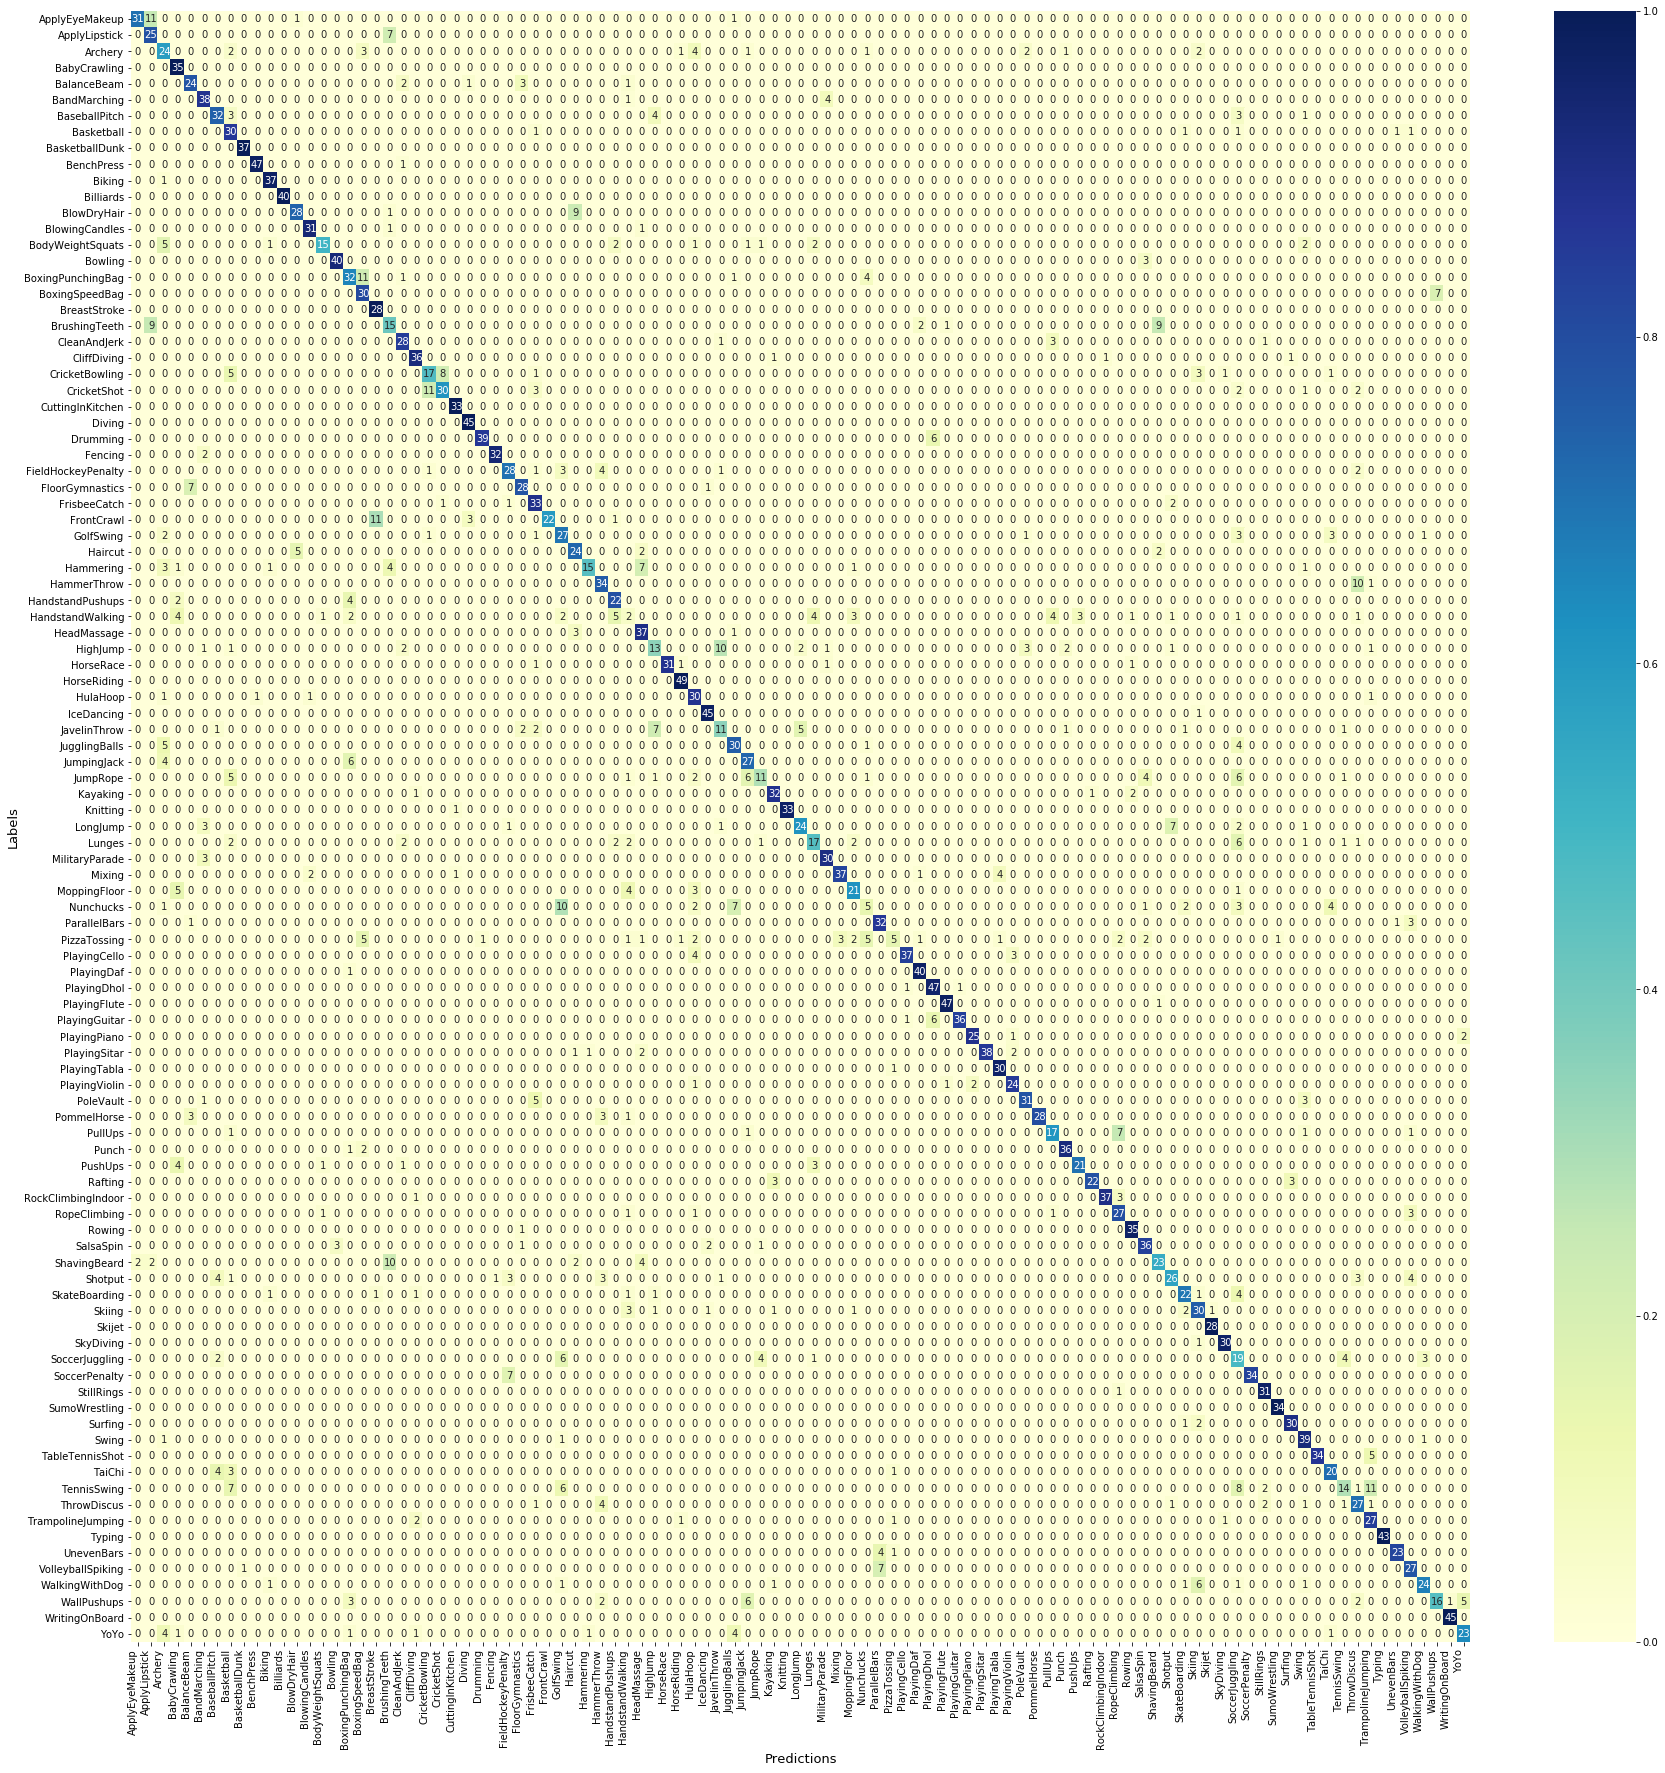

In [13]:
interp.plot_confusion_matrix()

In [14]:
interp.report()

Accuracy: 0.7710811525244515
                    precision    recall  f1-score   support

    ApplyEyeMakeup       0.94      0.70      0.81        44
     ApplyLipstick       0.53      0.78      0.63        32
           Archery       0.47      0.59      0.52        41
      BabyCrawling       0.67      1.00      0.80        35
       BalanceBeam       0.69      0.77      0.73        31
      BandMarching       0.79      0.88      0.84        43
     BaseballPitch       0.74      0.74      0.74        43
        Basketball       0.50      0.86      0.63        35
    BasketballDunk       0.97      1.00      0.99        37
        BenchPress       0.98      0.98      0.98        48
            Biking       0.90      0.97      0.94        38
         Billiards       1.00      1.00      1.00        40
       BlowDryHair       0.82      0.74      0.78        38
    BlowingCandles       0.91      0.94      0.93        33
  BodyWeightSquats       0.83      0.50      0.62        30
          